In [119]:
import numpy as np
import matplotlib.pyplot as plt 
import scipy as sp 

### 1. Définition de la fonction

In [120]:
T_ext = -5
T_ini = 20
r = 0.0008

def Temp_func(T_ext,T_ini, r, t):
    return(T_ext+(T_ini-T_ext)*np.exp(-r*t))

Temp_func_lambda = lambda t: T_ext+(T_ini-T_ext)*np.exp(-r*t)

time = np.arange(0,3600, 0.1)

Temp1 = Temp_func(T_ext, T_ini, r, time)
Temp2 = Temp_func_lambda(time)

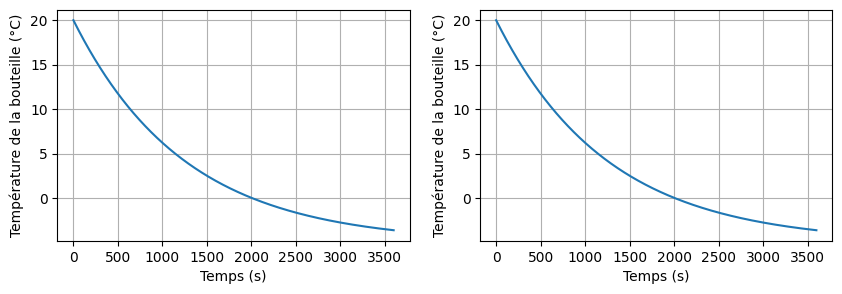

In [121]:
plt.figure(figsize =(10,3))

plt.subplot(1,2,1)
plt.plot(time,Temp1)
plt.xlabel("Temps (s)")
plt.ylabel("Température de la bouteille (°C)")
plt.grid(visible = True)

plt.subplot(1,2,2)
plt.plot(time,Temp2)
plt.xlabel("Temps (s)")
plt.ylabel("Température de la bouteille (°C)")
plt.grid(visible = True)

plt.show()

### 2. Dichotomie sans Scipy

In [122]:
def dichotomie (func, ta, tb, epsilon):
    try :
        if (func(ta)*func(tb)>0):
            raise Exception()
        else : 
            n_iter = 0
            while (abs(ta-tb)> epsilon):
                n_iter += 1 
                tm = (ta+tb)/2
                if(func(ta)*func(tm)>0):
                    ta = tm 
                else : 
                    tb = tm
        return tm, n_iter
    except :
        print("Mauvais choix de a ou b !")
        return 0

In [123]:
time_solution, n_iter = dichotomie(Temp_func_lambda, 500, 3500, 0.001)
print(time_solution)

2011.7967128753662


In [124]:
print(f"Il faudra {np.round(time_solution/60, decimals = 1)}minutes ")

Il faudra 33.5minutes 


### 3. Dichotomie avec Scipy

In [125]:
sol1 = sp.optimize.bisect(Temp_func_lambda, 500, 3500, xtol = 0.001, maxiter = 200)
print(sol1)

2011.7967128753662


In [126]:
### 4. Newton avec Scipy

In [127]:
sol2= sp.optimize.newton(Temp_func_lambda, 500)
print(sol2)

2011.7973905426252
